In [55]:
import pandas as pd
import numpy as np

df = pd.read_csv('minwage.csv')
act_min_wage = pd.DataFrame()
for name, group in df.groupby('State'):
    if act_min_wage.empty:
        act_min_wage = group.set_index('Year')[['Low.2018']].rename(columns={'Low.2018':name})
    else:
        act_min_wage = act_min_wage.join(group.set_index('Year')[['Low.2018']].rename(columns={'Low.2018':name}))
        
act_min_wage.head() 

min_wage_corr = act_min_wage.replace(0,np.NaN).dropna(axis=1).corr()

min_wage_corr.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,...,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,...,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,...,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,...,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,...,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971


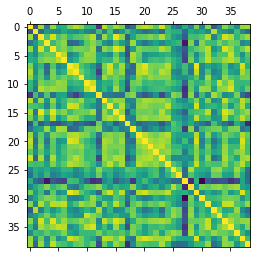

In [2]:
import matplotlib.pyplot as plt

plt.matshow(min_wage_corr)
# pyplot. matshow() function is used to represent an array as a matrix in a new figure window. 
# the upper left-hand corner is set as the origin and the rows (first dimension of the array) are displayed in a horizontal form.

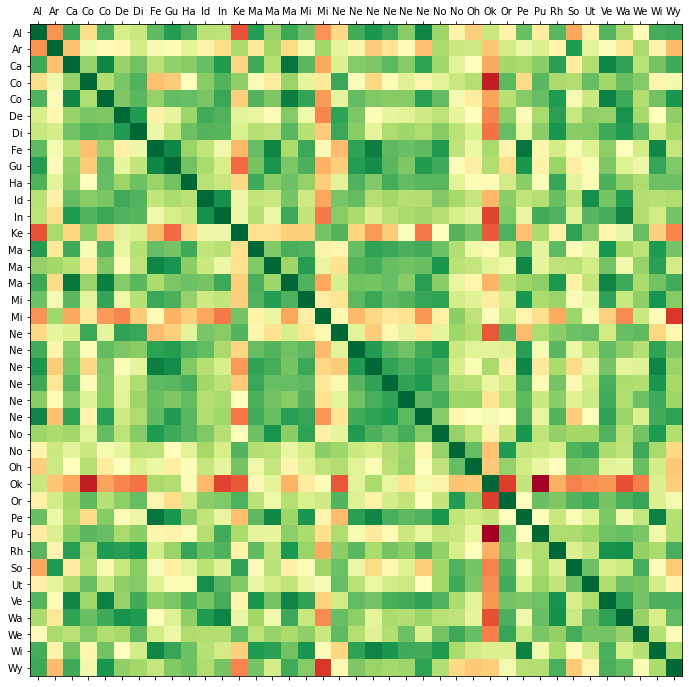

In [56]:
labels = [c[:2] for c in min_wage_corr.columns] # Al for Alabama, Co for Colorado etc etc
# if you want to modify things, you can not modify an plt, you can only modify an axis --> to have an axis I need a subplot --> to have u subplot I need a figure
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # --> 1 by 1 grid, and this is number 1 grid
ax.matshow(min_wage_corr, cmap = plt.cm.RdYlGn) # cmap --> color map
# first do the matshow and then modify the grids

ax.set_xticks(np.arange(len(labels))) # show all the labels and not just the first ones in the list labels
ax.set_yticks(np.arange(len(labels)))

ax.set_yticklabels(labels)
ax.set_xticklabels(labels)
plt.show()

In [57]:
dfs = pd.read_html('https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes')


In [58]:
for df in dfs:
    print(df.head())

  State/District Abbreviation Postal Code
0        Alabama         Ala.          AL
1         Alaska       Alaska          AK
2        Arizona        Ariz.          AZ
3       Arkansas         Ark.          AR
4     California       Calif.          CA
  Territory/Associate Abbreviation Postal Code
0      American Samoa            Â          AS
1                Guam         Guam          GU
2    Marshall Islands            Â          MH
3          Micronesia            Â          FM
4   Northern Marianas            Â          MP


In [59]:
state_abbv = dfs[0]

In [60]:
state_abbv.head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [61]:
state_abbv.to_csv('state_abbv.csv', index=False)
state_abbv = pd.read_csv('state_abbv.csv')
#state_abbv.drop('Abbreviation', inplace=True, axis=0)
state_abbv.head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [62]:
abbv_dict = state_abbv[['Postal Code']].to_dict()

In [63]:
abbv_dict


{'Postal Code': {0: 'AL',
  1: 'AK',
  2: 'AZ',
  3: 'AR',
  4: 'CA',
  5: 'CO',
  6: 'CT',
  7: 'DE',
  8: 'DC',
  9: 'FL',
  10: 'GA',
  11: 'HI',
  12: 'ID',
  13: 'IL',
  14: 'IN',
  15: 'IA',
  16: 'KS',
  17: 'KY',
  18: 'LA',
  19: 'ME',
  20: 'MD',
  21: 'MA',
  22: 'MI',
  23: 'MN',
  24: 'MS',
  25: 'MO',
  26: 'MT',
  27: 'NE',
  28: 'NV',
  29: 'NH',
  30: 'NJ',
  31: 'NM',
  32: 'NY',
  33: 'NC',
  34: 'ND',
  35: 'OH',
  36: 'OK',
  37: 'OR',
  38: 'PA',
  39: 'RI',
  40: 'SC',
  41: 'SD',
  42: 'TN',
  43: 'TX',
  44: 'UT',
  45: 'VT',
  46: 'VA',
  47: 'WA',
  48: 'WV',
  49: 'WI',
  50: 'WY'}}

In [64]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]

KeyError: 'Alaska'

In [65]:
min_wage_corr


,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,...,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,...,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,...,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,...,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,...,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971
Delaware,0.258997,0.016125,0.479197,0.566304,0.552613,1.000000,0.796457,-0.009271,0.179312,0.466178,...,0.038750,0.427616,0.772410,0.318865,0.501815,0.487378,0.830850,0.436045,0.071042,0.502713
District of Columbia,0.321785,0.266889,0.596865,0.673371,0.652488,0.796457,1.000000,0.151129,0.335275,0.603762,...,0.159928,0.513618,0.820135,0.525490,0.537581,0.718686,0.798094,0.644477,0.267017,0.438793
Federal (FLSA),0.637679,0.117245,0.371966,-0.232035,0.487750,-0.009271,0.151129,1.000000,0.881708,0.472021,...,0.942402,0.011784,0.266963,0.098267,0.221539,0.504419,0.075067,0.272645,0.870658,0.328639
Guam,0.787915,0.039593,0.492052,-0.192616,0.632073,0.179312,0.335275,0.881708,1.000000,0.590844,...,0.814443,-0.002810,0.472814,-0.022460,0.098186,0.557049,0.223620,0.147441,0.738986,0.542694
Hawaii,0.672620,0.204801,0.519241,0.069800,0.621503,0.466178,0.603762,0.472021,0.590844,1.000000,...,0.517041,0.097491,0.741192,0.197210,0.099742,0.692043,0.500421,0.408709,0.599138,0.599665


In [66]:
abbv_dict['Alaska'] = 'AL'

In [67]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]

KeyError: 'Arkansas'

In [68]:
abbv_dict['Arkansas'] = 'AR'

In [69]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]

KeyError: 'California'

In [70]:
abbv_dict['California'] = 'CA'

In [71]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]

KeyError: 'Colorado'

In [72]:
min_wage_corr

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,...,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,...,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,...,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,...,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,...,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971
Delaware,0.258997,0.016125,0.479197,0.566304,0.552613,1.000000,0.796457,-0.009271,0.179312,0.466178,...,0.038750,0.427616,0.772410,0.318865,0.501815,0.487378,0.830850,0.436045,0.071042,0.502713
District of Columbia,0.321785,0.266889,0.596865,0.673371,0.652488,0.796457,1.000000,0.151129,0.335275,0.603762,...,0.159928,0.513618,0.820135,0.525490,0.537581,0.718686,0.798094,0.644477,0.267017,0.438793
Federal (FLSA),0.637679,0.117245,0.371966,-0.232035,0.487750,-0.009271,0.151129,1.000000,0.881708,0.472021,...,0.942402,0.011784,0.266963,0.098267,0.221539,0.504419,0.075067,0.272645,0.870658,0.328639
Guam,0.787915,0.039593,0.492052,-0.192616,0.632073,0.179312,0.335275,0.881708,1.000000,0.590844,...,0.814443,-0.002810,0.472814,-0.022460,0.098186,0.557049,0.223620,0.147441,0.738986,0.542694
Hawaii,0.672620,0.204801,0.519241,0.069800,0.621503,0.466178,0.603762,0.472021,0.590844,1.000000,...,0.517041,0.097491,0.741192,0.197210,0.099742,0.692043,0.500421,0.408709,0.599138,0.599665


In [73]:
abbv_dict

{'Postal Code': {0: 'AL',
  1: 'AK',
  2: 'AZ',
  3: 'AR',
  4: 'CA',
  5: 'CO',
  6: 'CT',
  7: 'DE',
  8: 'DC',
  9: 'FL',
  10: 'GA',
  11: 'HI',
  12: 'ID',
  13: 'IL',
  14: 'IN',
  15: 'IA',
  16: 'KS',
  17: 'KY',
  18: 'LA',
  19: 'ME',
  20: 'MD',
  21: 'MA',
  22: 'MI',
  23: 'MN',
  24: 'MS',
  25: 'MO',
  26: 'MT',
  27: 'NE',
  28: 'NV',
  29: 'NH',
  30: 'NJ',
  31: 'NM',
  32: 'NY',
  33: 'NC',
  34: 'ND',
  35: 'OH',
  36: 'OK',
  37: 'OR',
  38: 'PA',
  39: 'RI',
  40: 'SC',
  41: 'SD',
  42: 'TN',
  43: 'TX',
  44: 'UT',
  45: 'VT',
  46: 'VA',
  47: 'WA',
  48: 'WV',
  49: 'WI',
  50: 'WY'},
 'Alaska': 'AL',
 'Arkansas': 'AR',
 'California': 'CA'}